In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import os
import torch.nn as nn
from torch.optim import Adam

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch.autograd import Variable
from torch.optim import lr_scheduler

%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b'ImageId\r\n0000f269f.jpg\r\n000ccc2ac.jpg\r\n002451917.jpg\r\n003c5da97.jpg\r\n0042e163f.jpg\r\n004f40c73.jpg\r\n00513039a.jpg\r\n006f39c41.jpg\r\n008725cbc.jpg\r\n0098ca44e.jpg\r\n00a0b7730.jpg\r\n00a0f9949.jpg\r\n00b000b81.jpg\r\n00b7fb703.jpg\r\n00bbcd9af.jpg\r\n00d72c660.jpg\r\n00df5b714.jpg\r\n00f3799a7.jpg\r\n0108ce457.jpg\r\n0109b68ec.jpg\r\n010ec96b4.jpg\r\n011a7e2a9.jpg\r\n0126f74ef.jpg\r\n012754bbb.jpg\r\n01588ee42.jpg\r\n015be539e.jpg\r\n017796c88.jpg\r\n017bd7ce3.jpg\r\n018d7b0a1.jpg\r\n019258298.jpg\r\n0197bb47e.jpg\r\n01b17e176.jpg\r\n01b2163b7.jpg\r\n01b47d973.jpg\r\n01b50837f.jpg\r\n01cc31534.jpg\r\n01d3e8fcb.jpg\r\n01d49cd47.jpg\r\n01db22c17.jpg\r\n01e640f20.jpg\r\n020ffb2d3.jpg\r\n021656fe0.jpg\r\n02217a5cc.jpg\r\n0224561d0.jpg\r\n0241cf678.jpg\r\n0246ad619.jpg\r\n02538bec6.jpg\r\n02662fd2f.jpg\r\n0280c72a9.jpg\r\n028aca84a.jpg\r\n029e85b9e.jpg\r\n02a2397e9.jpg\r\n02a5c3ba0.jpg\r\n02aeac4e1.jpg\r\n02ba931ee.jpg\r\n02d5824f4.jpg\r\n02d963811.jpg\r\n0308d

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.head()

,ImageId,ClassId
0,0002cc93b.jpg,1
1,0007a71bf.jpg,3
2,000a4bcdd.jpg,1
3,000f6bf48.jpg,4
4,0014fce06.jpg,3


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImageId  7095 non-null   object
 1   ClassId  7095 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 111.0+ KB


In [ ]:
test.head()

,ImageId
0,0000f269f.jpg
1,000ccc2ac.jpg
2,002451917.jpg
3,003c5da97.jpg
4,0042e163f.jpg


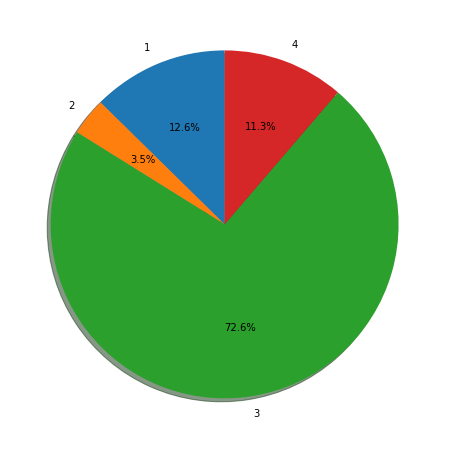

In [ ]:
label='1','2','3','4'
plt.figure(figsize = (8,8))
plt.pie(train.groupby('ClassId').size(), labels = label,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [ ]:
train=train[train['ClassId'].notna()]

In [ ]:
train['ClassId'].unique()

array([1., 3., 4., 2.])

In [ ]:
def str_to_numeric(inpdata):
  if(inpdata==1):
    return("one")
  elif(inpdata==2):
    return("Two")
  elif(inpdata==3):
    return("Three")
  else:
     return("Four")     


In [ ]:
train['ClassId']=train['ClassId'].apply(str_to_numeric)

In [ ]:
train['ClassId']=train['ClassId'].astype('int')

In [ ]:
train_path = '/content/drive/MyDrive/train_images/'
test_path = '/content/drive/MyDrive/test_images/'

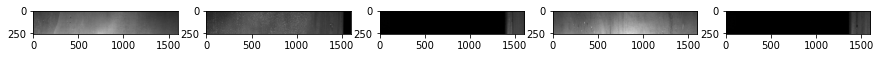

In [ ]:
import matplotlib.image as img
fig,ax = plt.subplots(1,5,figsize = (15,3))

for i,idx in enumerate(train[train['ClassId'] == 1]['ImageId'][-5:]):
    path = os.path.join(train_path,idx)
    ax[i].imshow(img.imread(path))

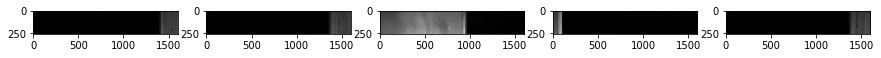

In [ ]:
import matplotlib.image as img
fig,ax = plt.subplots(1,5,figsize = (15,3))

for i,idx in enumerate(train[train['ClassId'] == 2]['ImageId'][-5:]):
    path = os.path.join(train_path,idx)
    ax[i].imshow(img.imread(path))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [ ]:
class steeldefectDataset(Dataset):
    def __init__(self, data, path , transform = None):
        super().__init__()
        self.data = data.values
        self.path = path
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
        img_name,label = self.data[index]
        img_path = os.path.join(self.path, img_name)
        image = img.imread(img_path)
        if self.transform is not None:
            image = self.transform(image)
        return image, label

In [ ]:
mean = np.array([0.485, 0.485, 0.485])
std = np.array([0.224, 0.224, 0.224])

In [ ]:
train_transform = transforms.Compose([transforms.ToPILImage(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean,std)])

test_transform = transforms.Compose([transforms.ToPILImage(),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean,std)])

valid_transform = transforms.Compose([transforms.ToPILImage(),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean,std)])

In [ ]:
train, valid_data = train_test_split(train, stratify=train.ClassId, test_size=0.2) 

In [ ]:
train_data = steeldefectDataset(train, train_path, train_transform )
valid_data = steeldefectDataset(valid_data, train_path, valid_transform )
test_data = steeldefectDataset(test, test_path, test_transform )

In [ ]:
num_epochs = 35
num_classes = 4
batch_size = 16
learning_rate = 0.01

In [ ]:
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle=True, num_workers=0)
valid_loader = DataLoader(dataset = valid_data, batch_size = batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle=False, num_workers=0)

In [ ]:
trainimages, trainlabels = next(iter(train_loader))
print(trainimages.shape)
print(trainlabels.shape)

torch.Size([16, 3, 256, 1600])
torch.Size([16])


In [ ]:
class ConvNet(nn.Module):
    def __init__(self,num_classes):
        super(ConvNet,self).__init__()
        self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
        self.bn1=nn.BatchNorm2d(num_features=12)
        self.relu1=nn.ReLU()
        self.pool=nn.MaxPool2d(kernel_size=2)

        self.conv2=nn.Conv2d(in_channels=12,out_channels=4,kernel_size=3,stride=1,padding=1)
        self.relu2=nn.ReLU()


        self.conv3=nn.Conv2d(in_channels=4,out_channels=8,kernel_size=3,stride=1,padding=1)
        self.bn3=nn.BatchNorm2d(num_features=8)
        self.relu3=nn.ReLU()

        self.fc=nn.Linear(in_features=128 * 800 * 8,out_features=num_classes)
        self.logit = nn.LogSoftmax(dim=1)

    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
            
        output=self.pool(output)
            
        output=self.conv2(output)
        output=self.relu2(output)
            
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)

        output=output.view(-1,8*128*800)

        output=self.fc(output)

        logit = self.logit(output)
        return logit 



In [ ]:
model=ConvNet(num_classes=5)

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
num_epochs=10

In [ ]:
train_losses = []
valid_losses = []

for epoch in range(1, num_epochs + 1):

    train_loss = 0.0
    valid_loss = 0.0
    

    model.train()
    for data, target in train_loader:
       
        data = data
        target = target
        optimizer.zero_grad()
        output = torch.softmax(model.forward(data),1)
        target=target.squeeze()
        target=target.long()

        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
  
    model.eval()
    for data, target in valid_loader:
        
        data = data
        target = target
        
        output = torch.softmax(model.forward(data),1)
        target=target.squeeze()
        target=target.long()
        
        loss = criterion(output, target)
        
       
        valid_loss += loss.item()
    
  
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
        

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

KeyboardInterrupt: ignored

In [ ]:
model.eval()  # it-disables-dropout
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in valid_loader:
        images = images
        labels = labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
    print('Test Accuracy of the model: {} %'.format(100 * correct / total))

Test Accuracy of the model: 72.58632840028189 %


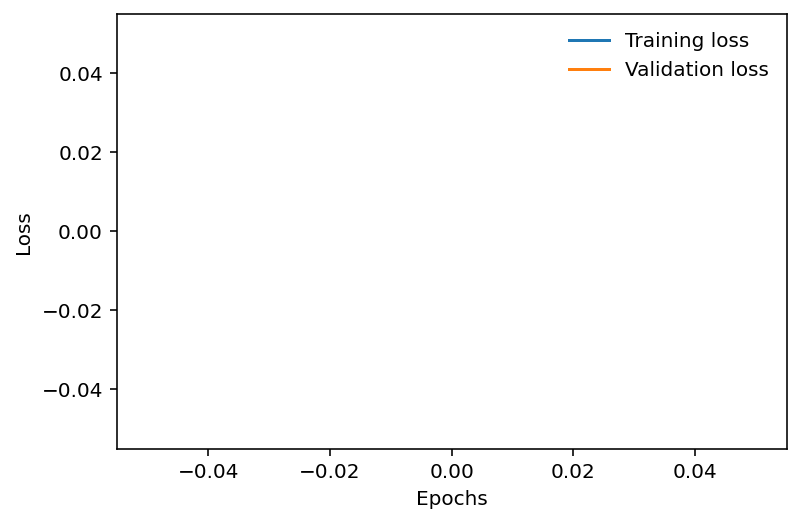

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)